# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [3]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

615

In [4]:
url = "http://api.openweathermap.org/data/2.5/weather?"
units="imperial"
query_url = f"{url}appid={weather_api_key}&units={units}&q="
response = requests.get(query_url + city).json()
print(response)

{'coord': {'lon': 19.23, 'lat': -34.42}, 'weather': [{'id': 803, 'main': 'Clouds', 'description': 'broken clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': 53.01, 'feels_like': 51.03, 'temp_min': 53.01, 'temp_max': 53.01, 'pressure': 1017, 'humidity': 97}, 'wind': {'speed': 4.74, 'deg': 74}, 'clouds': {'all': 82}, 'dt': 1590796201, 'sys': {'type': 3, 'id': 2006131, 'country': 'ZA', 'sunrise': 1590817204, 'sunset': 1590853297}, 'timezone': 7200, 'id': 3366880, 'name': 'Hermanus', 'cod': 200}


### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [5]:
city_name_log = []
city_id_log = []
unknown_cities = []
country_name_log=[]
lat = []
long=[]
temp=[]
humidity = []
cloudiness = []
wind_speed = []


# Build query URL
#query_url = url + "appid=" + weather_api_key + "&q=" + city

query_url = f"{url}appid={weather_api_key}&units={units}&q="

for city in cities:
    try: 
        response = requests.get(query_url + city).json()
        lat.append(response['coord']['lat'])
        long.append(response['coord']['lon'])
        temp.append(response['main']['temp_max'])
        cloudiness.append(response['clouds']['all'])
        humidity.append(response['main']['humidity'])
        wind_speed.append(response['wind']['speed'])
        city_name_log.append(response['name'])
        city_id_log.append(response['id'])
        country_name_log.append(response["sys"]["country"])
        print(f"City Name and Number  = {response['name']}, {response['id']}")
        #print(f"Cities found are:City Name = {city_name_log} City Number = {city_id_log}")

    except: 
        unknown_cities.append(city) 

        

City Name and Number  = Manta, 3654410
City Name and Number  = Punta Arenas, 3874787
City Name and Number  = Tupik, 2014836
City Name and Number  = Rikitea, 4030556
City Name and Number  = Krasnokholm, 542322
City Name and Number  = Tailai, 2034599
City Name and Number  = Cayenne, 3382160
City Name and Number  = Mauá, 3457381
City Name and Number  = Yablonovo, 578283
City Name and Number  = Hokitika, 2206894
City Name and Number  = Hasaki, 2112802
City Name and Number  = Chardara, 1524889
City Name and Number  = Maceió, 3395981
City Name and Number  = Salalah, 286621
City Name and Number  = Esperance, 2071860
City Name and Number  = Ushuaia, 3833367
City Name and Number  = Tuktoyaktuk, 6170031
City Name and Number  = San Cristobal, 3628473
City Name and Number  = Nantucket, 4944903
City Name and Number  = Laguna, 5364271
City Name and Number  = Nome, 5870133
City Name and Number  = Ponta do Sol, 2264557
City Name and Number  = Lüderitz, 3355672
City Name and Number  = Alugan, 1731248
C

City Name and Number  = Airai, 1651810
City Name and Number  = Mehamn, 778707
City Name and Number  = Kungurtug, 1501377
City Name and Number  = Bilibino, 2126682
City Name and Number  = San Patricio, 3985168
City Name and Number  = Charters Towers, 2171722
City Name and Number  = Gilbués, 3398931
City Name and Number  = Ostrovnoy, 556268
City Name and Number  = Kotma, 1265964
City Name and Number  = Newport, 2641598
City Name and Number  = Soúda, 253456
City Name and Number  = Xaçmaz, 584717
City Name and Number  = Qinzhou, 1797551
City Name and Number  = Norman Wells, 6089245
City Name and Number  = Flin Flon, 5954718
City Name and Number  = Arawa, 2100633
City Name and Number  = Khromtau, 609404
City Name and Number  = Zelenoborskiy, 463838
City Name and Number  = Praia da Vitória, 3372760
City Name and Number  = Haines Junction, 5969025
City Name and Number  = Ust-Kuyga, 2013921
City Name and Number  = Wuzhou, 1790840
City Name and Number  = Kloulklubed, 7671223
City Name and Numbe

City Name and Number  = Liverpool, 2644210
City Name and Number  = Presidente Epitácio, 3452331
City Name and Number  = Quelimane, 1028434
City Name and Number  = Lima, 3936456
City Name and Number  = Plouzané, 2986626
City Name and Number  = Zhezkazgan, 1516589
City Name and Number  = Bétaré Oya, 2234339
City Name and Number  = Semnan, 116402
City Name and Number  = Tulu Bolo, 327234
City Name and Number  = San Juan, 3837213
City Name and Number  = Lakes Entrance, 2160735
City Name and Number  = Walvis Bay, 3359638
City Name and Number  = Los Llanos de Aridane, 2514651
City Name and Number  = Dumai, 1645133
City Name and Number  = Afuá, 3408269
City Name and Number  = Clyde River, 5924351
City Name and Number  = Lebanon, 4636045
City Name and Number  = Alihe, 2038665
City Name and Number  = Aklavik, 5882953
City Name and Number  = Antalaha, 1071296
City Name and Number  = Auki, 2109701
City Name and Number  = Khetia, 1266746
City Name and Number  = Kokkola, 651943
City Name and Number

In [6]:
print(f"Error, some cities were not found:\n {unknown_cities}\n")


Error, some cities were not found:
 ['samusu', 'louisbourg', 'taolanaro', 'bargal', 'mys shmidta', 'illoqqortoormiut', 'barentsburg', 'grand river south east', 'orgun', 'tsihombe', 'bababe', 'amderma', 'zolotinka', 'attawapiskat', 'vaitupu', 'belushya guba', 'urdzhar', 'saleaula', 'galiwinku', 'fevralsk', 'burica', 'warqla', 'sorvag', 'kazalinsk', 'lolua', 'phan rang', 'wahran', 'karamea', 'barawe', 'tumannyy', 'nizhneyansk', 'umzimvubu', 'tarhunah', 'viligili', 'nguiu', 'kawana waters', 'dolbeau', 'tabiauea', 'haapu', 'sentyabrskiy', 'rawannawi', 'bolshaya murta', 'dzhusaly', 'temaraia', 'kegayli', 'mrirt', 'muktagachha']



### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [11]:

d = {"City Name" : city_name_log, "Country": country_name_log, "City ID": city_id_log, "Latitude": lat, "Longitude": long, "Max Temperature": temp,
     "Humidity": humidity, "Cloudiness (%)": cloudiness, "Wind Speed": wind_speed}

df = pd.DataFrame(d)
df.head()

,City Name,Country,City ID,Latitude,Longitude,Max Temperature,Humidity,Cloudiness (%),Wind Speed
0,La Ronge,CA,6050066,55.10,-105.28,39.20,27,75,10.29
1,Antón Lizardo,MX,3532821,19.05,-95.98,86.00,66,40,13.87
2,Albany,US,5106841,42.60,-73.97,46.99,97,99,12.84
3,Borogontsy,RU,2026160,62.67,131.17,32.79,94,100,5.73
4,Bluff,NZ,2206939,-46.60,168.33,49.91,76,46,11.50


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [12]:
Humidity_check =df["Humidity"].max()
print(Humidity_check)

100


In [13]:
#  Get the indices of cities that have humidity over 100% if any
Humidity_df = df.loc[df["Humidity"]>100]
print(Humidity_df)
# Drop data for citie with humidity over 100% if any
df.drop(df.index[df.Humidity > 100])


Empty DataFrame
Columns: [City Name, Country, City ID, Latitude, Longitude, Max Temperature, Humidity, Cloudiness (%), Wind Speed]
Index: []


,City Name,Country,City ID,Latitude,Longitude,Max Temperature,Humidity,Cloudiness (%),Wind Speed
0,La Ronge,CA,6050066,55.10,-105.28,39.20,27,75,10.29
1,Antón Lizardo,MX,3532821,19.05,-95.98,86.00,66,40,13.87
2,Albany,US,5106841,42.60,-73.97,46.99,97,99,12.84
3,Borogontsy,RU,2026160,62.67,131.17,32.79,94,100,5.73
4,Bluff,NZ,2206939,-46.60,168.33,49.91,76,46,11.50
...,...,...,...,...,...,...,...,...,...
562,Andrychów,PL,3104115,49.85,19.34,51.80,93,75,20.80
563,Keti Bandar,PK,1174451,24.14,67.45,80.67,88,90,12.86
564,Abu Dhabi,AE,292968,24.47,54.37,86.00,51,23,12.75
565,Ibrā’,OM,287832,22.69,58.53,81.95,54,2,2.37


In [14]:
# Extract relevant fields from the data frame


# Export the City_Data into a csv
df.to_csv("../output_data/WeatherPy_Log.csv", index=False)


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

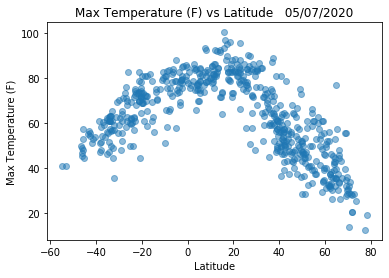

This plot shows the relationship between average temperature and latitude for the cities generated. 
Some coordinates were missing data on the weather website and they are listed above.
There is a visible linear relationship between Latitude and temperature


In [50]:
Temp_Lat= plt.scatter(lat, temp,  alpha=0.5)
plt.title('Max Temperature (F) vs Latitude   05/07/2020')
plt.ylabel('Max Temperature (F)')
plt.xlabel('Latitude')
plt.show()
print(f"This plot shows the relationship between average temperature and latitude for the cities generated. \nSome coordinates were missing data on the weather website and they are listed above.")
print(f"There is a visible linear relationship between Latitude and temperature")

fig = Temp_Lat.get_figure()
fig.savefig("../output_data/Temp_Lat.png")



## Latitude vs. Humidity Plot

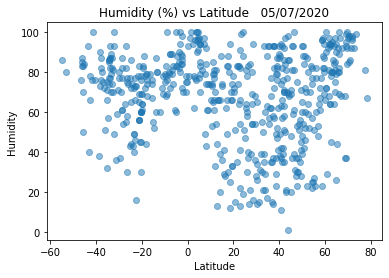

This plot shows the relationship between humidity and latitude for the cities generated. 
Some coordinates were missing data on the weather website and they are listed below.
The maximum humidity is 100% and no city recorded a humidity greater than 100%


In [51]:
Hum_Lat=plt.scatter(lat, humidity,  alpha=0.5)
plt.title('Humidity (%) vs Latitude   05/07/2020')
plt.ylabel('Humidity')
plt.xlabel('Latitude')
plt.show()
print(f"This plot shows the relationship between humidity and latitude for the cities generated. \nSome coordinates were missing data on the weather website and they are listed below.")
print(f"The maximum humidity is 100% and no city recorded a humidity greater than 100%")


fig = Hum_Lat.get_figure()
fig.savefig("../output_data/Hum_Lat.png")

## Latitude vs. Cloudiness Plot

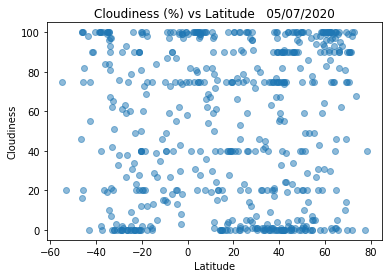

This plot shows the relationship between cloudiness and latitude for the cities generated. 
Some cities were missing data on the weather website and they are listed below
There is no evident relationship between Cloudiness and latitude.


In [52]:
Cloud_Lat = plt.scatter(lat, cloudiness,  alpha=0.5)
plt.title('Cloudiness (%) vs Latitude   05/07/2020')
plt.ylabel('Cloudiness')
plt.xlabel('Latitude')
plt.show()
print(f"This plot shows the relationship between cloudiness and latitude for the cities generated. \nSome cities were missing data on the weather website and they are listed below")
print(f"There is no evident relationship between Cloudiness and latitude.")
fig = Cloud_Lat.get_figure()
fig.savefig("../output_data/Cloud_Lat.png")

## Latitude vs. Wind Speed Plot

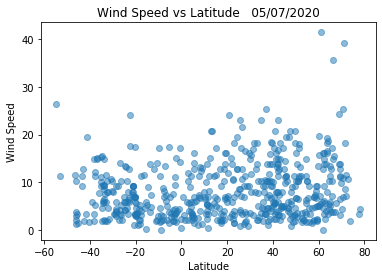

This plot shows the relationship between wind speed and latitude for the cities generated. 
 ome cities were missing data on the weather website and they are listed below


In [53]:

Wind_Lat = plt.scatter(lat, wind_speed,  alpha=0.5)
plt.title('Wind Speed vs Latitude   05/07/2020')
plt.ylabel('Wind Speed')
plt.xlabel('Latitude')
plt.show()
print(f"This plot shows the relationship between wind speed and latitude for the cities generated. \n ome cities were missing data on the weather website and they are listed below")

fig = Wind_Lat.get_figure()
fig.savefig("../output_data/Wind_Lat.png")


In [54]:
# Create Northern and Southern Hemisphere DataFrames
df_North = df.loc[df["Latitude"]>0]
df_South = df.loc[df["Latitude"]<0]

# OPTIONAL: Create a function to create Linear Regression plots
Regression_Data_Y=[df_South['Max Temperature'], df_North['Max Temperature'], df_South["Humidity"],
                   df_North["Humidity"], df_South["Cloudiness (%)"], df_North["Cloudiness (%)"], 
                   df_South["Wind Speed"], df_North["Wind Speed"]]

Regression_Data_X = [df_South['Latitude'], df_North['Latitude'], df_South['Latitude'], df_North['Latitude'],
df_South['Latitude'],df_North['Latitude'], df_South['Latitude'], df_North['Latitude']]

Regression_Data_Labels = ["Max Temperature South", "Max Temperature North", "Humidity South", "Humidity North",
                          "Cloudiness (%) South","Cloudiness (%) North", "Wind Speed South", "Wind Speed North"]


In [1]:
#Calculate the linear regressions
for i in range(1):

    x_values = Regression_Data_X[i]
    y_values = Regression_Data_Y[i]
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r-")
    #plt.annotate(line_eq,(6,10),fontsize=15,color="red")
    plt.ylabel(Regression_Data_Labels[i])
    plt.xlabel('Latitude')
    print(f"The r-squared for {Regression_Data_Labels[i]} is: {rvalue**2}")

    plt.show()
    print(f"\n")



NameError: name 'Regression_Data_X' is not defined

In [48]:
print(f"   The first two plots show the relationship between temperature and latitude. There is an evident \n\
visual correlation and the r**2 values of 60 and 72 respectively give a fairly high confidence that temperature \n\
is strongly affected by latitude, especially in the Northern hemisphere. There are some outliers, especially in the \n\
Southern Hemisphere. Presumably these indicate factors other than Latitude which also influence temperature.")
    
print(f"    The second pair of plots show the relationship between Humidity and Latitude. There is no consistent pattern and \n\
the r **2 values are also quite low.")
      
print(f"    The third pair of plots show the relationship between Cloudiness and Latitude. There is no consistent pattern and \n\
the r **2 values are also quite low. The data is affected by a large number of data points at both 0 and 100%.")

print(f"    The final pair of plots show the relationship between Wind Speed and Latitude. The data appear visually \n\
to cluster around the linear regression line, but the r **2 values are still quite low, implying no linear \n\
correlation. The Northern Hemisphere has generally higher wind speeds and more outliers than the Southern Hemisphere.")

   The first two plots show the relationship between temperature and latitude. There is an evident 
visual correlation and the r**2 values of 60 and 72 respectively give a fairly high confidence that temperature 
is strongly affected by latitude, especially in the Northern hemisphere. There are some outliers, especially in the 
Southern Hemisphere. Presumably these indicate factors other than Latitude which also influence temperature.
    The second pair of plots show the relationship between Humidity and Latitude. There is no consistent pattern and 
the r **2 values are also quite low.
    The third pair of plots show the relationship between Cloudiness and Latitude. There is no consistent pattern and 
the r **2 values are also quite low. The data is affected by a large number of data points at both 0 and 100%.
    The final pair of plots show the relationship between Wind Speed and Latitude. The data appear visually 
to cluster around the linear regression line, but the r **2 values 

## Linear Regression

In [ ]:
# Create Northern and Southern Hemisphere DataFrames
# df_North = df.loc[df["Latitude"]>0]
# df_South = df.loc[df["Latitude"]<0]

# # OPTIONAL: Create a function to create Linear Regression plots
# Regression_Data_X_South=[df_South['Average Temperature'], df_South["Humidity"], df_South["Cloudiness (%)"], 
#                    df_South["Wind Speed"]]
# Regression_Data_Y_South = df_South['Latitude']

# Regression_Data_X_North=[df_North['Average Temperature'], df_North["Humidity"], df_North["Cloudiness (%)"], 
#                    df_North["Wind Speed"]]
# Regression_Data_Y_North = df_North['Latitude']

# Regression_Data_Labels = ["Avg Temperature", "Humidity %", "Cloudiness (%)", "Wind Speed"]



In [ ]:
# #Choose which hemisphere to plot
# Regression_Data_X = Regression_Data_X_South
# Regression_Data_Y = Regression_Data_Y_South

In [ ]:
# print(f"Plotting for the Southern Hemisphere\n")
# for i in range(4):

#     x_values = Regression_Data_X[i]
#     y_values = Regression_Data_Y
#     (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
#     regress_values = x_values * slope + intercept
#     line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
#     plt.scatter(x_values,y_values)
#     plt.plot(x_values,regress_values,"r-")
#     plt.annotate(line_eq,(6,10),fontsize=15,color="red")
#     plt.xlabel(Regression_Data_Labels[i])
#     plt.ylabel('Latitude')
#     print(f"The r-squared for {Regression_Data_Labels[i]} is: {rvalue**2}")

#     plt.show()
#     print(f"\n")

In [ ]:
#Reset the Data to plot the Northenr Hemisphere
# Regression_Data_X = Regression_Data_X_North
# Regression_Data_Y = Regression_Data_Y_North

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

In [ ]:
# print(f"Plotting for the Northern Hemisphere\n")
# for i in range(4):
#     x_values = Regression_Data_X[i]
#     y_values = Regression_Data_Y
#     (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
#     regress_values = x_values * slope + intercept
#     line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
#     plt.scatter(x_values,y_values)
#     plt.plot(x_values,regress_values,"r-")
#     plt.annotate(line_eq,(6,10),fontsize=15,color="red")
#     plt.xlabel(Regression_Data_Labels[i])
#     plt.ylabel('Latitude')
#     print(f"The r-squared for {Regression_Data_Labels[i]} is: {rvalue**2}")

#     plt.show()
#     print(f"\n")
    

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression